In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
df = pd.read_csv("noisy_curvefit_data.csv")
df.shape # (100, 6)
# There are 100 rows and 6 colummns
df.head(), df.tail()
# The column names are "x, y_noise_1, y_noise_2, y_noise_3, y_noise_4, y_noise_5"

(          x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
 0 -1.000000  11.624419   8.296963  12.201067   7.811725   3.155566
 1 -0.929293  10.377466   9.674440  12.198084   8.275006   7.518855
 2 -0.858586  10.585100   9.251983  13.186565  12.926586   9.963630
 3 -0.787879  10.913928   7.786344  12.552304  11.832379   9.625801
 4 -0.717172   8.640287   8.551869   4.741432   8.790834   6.624113,
            x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
 95  5.717172  -1.411918   0.822231  -2.027132  -1.825106   2.746147
 96  5.787879   0.344879  -1.718956   2.747559  -6.803779  -5.137472
 97  5.858586   0.307133   0.353528   0.967976   5.461567  -0.905616
 98  5.929293   0.048657   0.159961   2.482130  -0.414616  -4.334548
 99  6.000000  -0.193438  -2.244792   1.930035   4.992414  -6.872850)

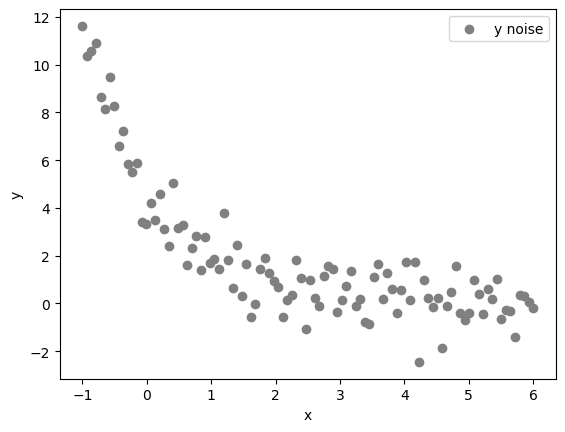

In [4]:
x = df["x"]
y = df["y_noise_1"]

plt.scatter(x, y, label = "y noise", color = "grey")
plt.xlabel("x"), plt.ylabel("y") # I dont know what the points actually are so I dont really know what the axis represent!
plt.legend()
plt.show()

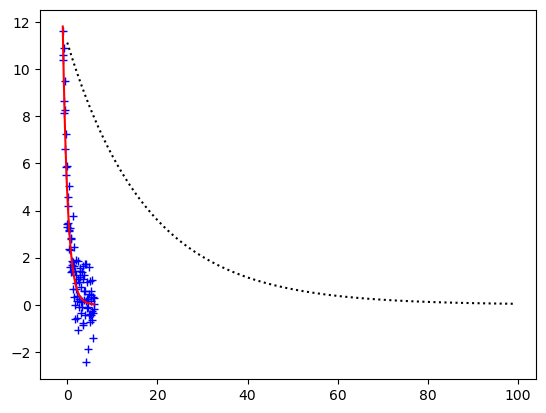

In [6]:
def model(x, A, k):
    return A * np.exp(-k * x)

p0 = [1,1]
popt, pcov = curve_fit(model, x, df["y_noise_1"], p0=p0)
A_fit, k_fit = popt
f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)"

residuals = df["y_noise_1"] - model(x, A_fit, k_fit)
chi2 = np.sum(residuals**2)
dof = len(x) - len(popt)
chi2_reduced = chi2 / dof


plt.plot(x,y, 'b+', label = "noise1")
plt.plot(x, A_fit*np.exp(-k_fit*x), color = "red") # Fitted Model 
plt.plot(model(x, 5, 0.8), color = "black", linestyle = ":") # True model?
# Labeling 